In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

### Pipeline:
Un ***pipeline*** es una ***clase*** que se instancia con una ***lista de tuplas*** ('nombre',clase()) en donde a cada tupla se le llama ***paso***, de nombre ***'nombre'***, y cuya clase puede ser del tipo ***"transformador"*** o del tipo ***"estimador"*** las cuales tienen la siguiente ***estructura*** mínima:  
  
#### Transformador:  
~~~python
from sklearn.base import TransformerMixin

class MiTransformador(TransformerMixin):
    def fit(self, X, y=None):
        # Lógica de ajuste del transformador
        return self

    def transform(self, X):
        # Lógica de transformación
        return X
~~~   
  
#### Estimador:  
~~~python
from sklearn.base import BaseEstimator

class MiEstimador(BaseEstimator):
    def fit(self, X, y):
        # Lógica de ajuste del modelo
        return self
    
    def predict(self, X):
        # Lógica de predicción
        return predictions
~~~   
#### Declaración y funcionamiento de pipeline:  
~~~python
from sklearn.pipeline import Pipeline

nombre_pipeline = Pipeline([
    ('Nombre_Clase1', Clase1()),
    ('Nombre_Clase2', Clase2()),
    ('Nombre_ClaseN', ClaseN()),
])
~~~ 
#### Reglas y Requisitos
1) Los ***pasos o clases***, se aplican en el **orden** en que aparecen en la **lista**.  
     
2) Cada **clase** tiene como mínimo un ***método fit*** y un ***método transform o predict*** (dependiendo de si es un transformador o un estimador).   
          
3) El ***método fit*** se devuelve a quien lo llamó en este caso la propia clase (***self***).(***no devuelve nada*** y continua con el siguiente método).
    
4) Métodos como ***transform, predict*** y otros ***devuelve valores***. 
  
5) Como mínimo el metodo fit de pipeline (pipeline.fit) recibe ***X*** e ***y*** como argumentos mientras que transform y otros sólo ***X***. De este modo **pipeline.fit(X,y)** y **transform(X)**.
  
6) **pipeline.fit(X,y)** supone la aplicación ***secuencial*** de fit(X,y) y luego transform(X) de ***cada clase***
  
7) Para ejecutar la secuencia completa de pasos es necesario primero ejecutar pipeline.fit(X,y) puede ejecutarse transform sin fit pero se quedará en el transform de la primera clase o paso.
~~~python
~~~  

#### Ejemplo:  
Primero el proceso hecho "a mano"  
Se pide:  
1) Abrir ***"datosPipeline.csv"*** analizar si tiene NaNs y eliminarlos.
2) Ajustar o entrenar con un modelo de regresion lineal.
  
  Primero se realiza el proceso manual de "1)" y luego con pipeline de "1)".   
  Y luego se repite todo con "2)"

In [28]:
df=pd.read_csv('datosPipeline.csv')
df.head(3)


,var,target
0,8.508446,19.176721
1,3.434914,14.031533
2,5.639698,16.679656


In [29]:
df.isna().sum()

var       6
target    2
dtype: int64

In [30]:
df1=df[['var','target']].dropna()
df1.isna().sum()

var       0
target    0
dtype: int64

In [31]:
df1.shape

(192, 2)

In [32]:
df.isna().sum()

var       6
target    2
dtype: int64

#### Ahora con pipeline  


In [39]:
# Definir una clase para eliminar los NaNs que tenga los metodos fit y transform, como mínimo.
class Clase1(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        y=y.dropna()
        return self

    def transform(self, X):
        return X.dropna()

# Crear los pasos pueden ser varios en este caso es uno solo.
pipeline = Pipeline([
    ('elimina_NaNs', Clase1()),
])

# Aplicar el pipeline al DataFrame para eliminar filas con NaNs con el método transform
df2 = pipeline.fit_transform(df)
# df2.isna().sum()

Parámetro de Clase1 desde fit_params: {}


##### Ahora el punto 2) "a mano"

In [60]:
X=df1.drop(['target'],axis=1)
y=df1[['target']].copy()
reg=LinearRegression().fit(X,y)
reg.score(X, y)

0.8524481126047226

##### Ahora como se haría con pipelines todo junto con la primera parte tambien.

In [ ]:
# ya se tiene definida la clase EliminarNans, y también la "LinearRegression"
# a si que solo se arman los pasos.

# Crear los pasos pueden ser varios en este caso es uno solo.
pipeline = Pipeline([
    ('elimina_NaNs', EliminarNans(columnas=columnas_a_procesar)),
    ('RegresionLineal',LinearRegression())
])

# Aplicar el pipeline al DataFrame para eliminar filas con NaNs con el método transform
df2 = pipeline.transform(df)
df2.isna().sum()

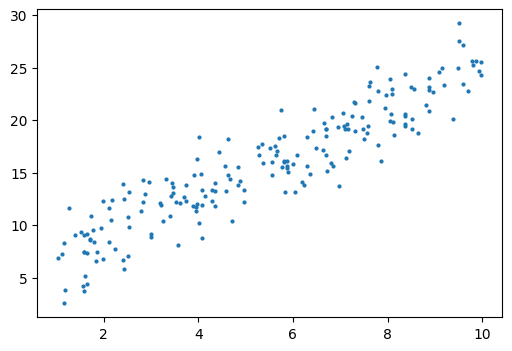

In [23]:
# x=np.random.uniform(1,10,200)
# y=2*x+5+np.random.normal(0,2,200)
# plt.figure(figsize=(6,4))
# plt.scatter(x,y,s=4)
# plt.show()

In [24]:
# # Crear un DataFrame con pandas
# df = pd.DataFrame({'var': x, 'target': y})

# # Guardar el DataFrame en un archivo CSV llamado datos.csv
# df.to_csv('datosPipeline.csv', index=False)

In [ ]:
from sklearn.base import TransformerMixin

class MiTransformador(TransformerMixin):
    def fit(self, X, y=None):
        # Lógica de ajuste del transformador
        return self
    
    def transform(self, X):
        # Lógica de transformación
        return X